In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv('C:/Users/cheli/spam.csv', encoding='latin-1')

# Display basic information
print(df.info())
print(df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB
None
     v1                                                 v2 Unnamed: 2  \
0   ham  Go until jurong point, crazy.. Available only ...        NaN   
1   ham                      Ok lar... Joking wif u oni...        NaN   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3   ham  U dun say so early hor... U c already then say...        NaN   
4   ham  Nah I don't think he goes to usf, he lives aro...        NaN   

  Unnamed: 3 Unnamed: 4  
0        NaN        NaN  
1        NaN        NaN  
2        NaN        NaN  
3        NaN        NaN 

In [2]:
# Drop unnecessary columns
df = df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'])

# Rename columns
df.columns = ['label', 'text']

# Map labels to binary values
df['label'] = df['label'].map({'ham': 0, 'spam': 1})

# Display the cleaned DataFrame
print(df.head())


   label                                               text
0      0  Go until jurong point, crazy.. Available only ...
1      0                      Ok lar... Joking wif u oni...
2      1  Free entry in 2 a wkly comp to win FA Cup fina...
3      0  U dun say so early hor... U c already then say...
4      0  Nah I don't think he goes to usf, he lives aro...


In [3]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Download necessary NLTK data
nltk.download('stopwords')
nltk.download('wordnet')

# Initialize lemmatizer and stopwords
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

# Function to clean text
def clean_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'[^a-z\s]', '', text)  # Remove special characters and numbers
    words = text.split()
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    return ' '.join(words)

# Apply cleaning function to the 'text' column
df['cleaned_text'] = df['text'].apply(clean_text)

# Display the cleaned text
print(df[['text', 'cleaned_text']].head())


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\cheli\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\cheli\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


                                                text  \
0  Go until jurong point, crazy.. Available only ...   
1                      Ok lar... Joking wif u oni...   
2  Free entry in 2 a wkly comp to win FA Cup fina...   
3  U dun say so early hor... U c already then say...   
4  Nah I don't think he goes to usf, he lives aro...   

                                        cleaned_text  
0  go jurong point crazy available bugis n great ...  
1                            ok lar joking wif u oni  
2  free entry wkly comp win fa cup final tkts st ...  
3                u dun say early hor u c already say  
4           nah dont think go usf life around though  


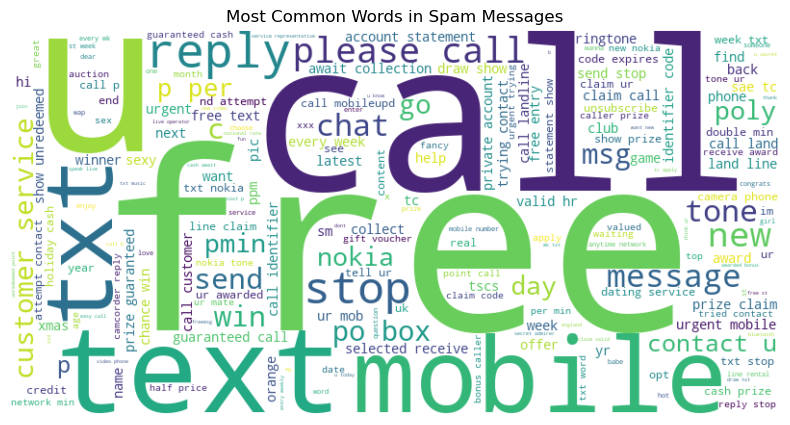

In [4]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Generate word cloud for spam messages
spam_words = ' '.join(df[df['label'] == 1]['cleaned_text'])
spam_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(spam_words)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(spam_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Words in Spam Messages')
plt.show()


In [5]:
from collections import Counter
from nltk.util import ngrams

# Function to get n-grams
def get_top_ngrams(corpus, n=2, top_k=10):
    n_grams = Counter(ngrams(' '.join(corpus).split(), n))
    return n_grams.most_common(top_k)

# Get top bigrams and trigrams for spam messages
spam_bigrams = get_top_ngrams(df[df['label'] == 1]['cleaned_text'], n=2)
spam_trigrams = get_top_ngrams(df[df['label'] == 1]['cleaned_text'], n=3)

print("Top Bigrams in Spam Messages:", spam_bigrams)
print("Top Trigrams in Spam Messages:", spam_trigrams)


Top Bigrams in Spam Messages: [(('please', 'call'), 46), (('po', 'box'), 28), (('customer', 'service'), 27), (('p', 'per'), 25), (('contact', 'u'), 24), (('guaranteed', 'call'), 23), (('call', 'landline'), 23), (('prize', 'guaranteed'), 22), (('claim', 'call'), 19), (('chance', 'win'), 19)]
Top Trigrams in Spam Messages: [(('prize', 'guaranteed', 'call'), 21), (('call', 'land', 'line'), 18), (('private', 'account', 'statement'), 16), (('call', 'customer', 'service'), 15), (('call', 'identifier', 'code'), 15), (('guaranteed', 'call', 'land'), 15), (('call', 'p', 'per'), 15), (('identifier', 'code', 'expires'), 14), (('land', 'line', 'claim'), 14), (('draw', 'show', 'prize'), 13)]


In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1, 2))

# Fit and transform the cleaned text
X = tfidf_vectorizer.fit_transform(df['cleaned_text'])

# Target variable
y = df['label']

# Display the shape of the TF-IDF matrix
print("TF-IDF matrix shape:", X.shape)


TF-IDF matrix shape: (5572, 5000)


In [7]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)


Training set size: (4457, 5000)
Testing set size: (1115, 5000)


In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Initialize and train the model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9515695067264573
Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97       965
           1       0.99      0.65      0.78       150

    accuracy                           0.95      1115
   macro avg       0.97      0.82      0.88      1115
weighted avg       0.95      0.95      0.95      1115

